# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Test set Image Processing

In [3]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = valid_ds.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [4]:
model = tf.keras.models.load_model('models/trained_model2.keras')

# Visualising and Performing Prediction on Single image

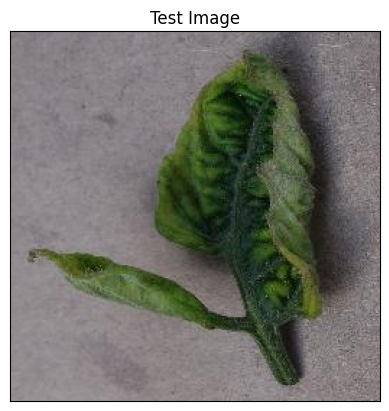

In [ ]:
# Single Img
image_path = 'New Plant Diseases Dataset(Augmented)/test/test/TomatoYellowCurlVirus3.JPG'

# Load and show the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [ ]:
# Preprocess the image: resize, normalize, and batch it
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = input_arr / 255.0  # 
input_arr = np.expand_dims(input_arr, axis=0)  

In [58]:
print(predictions)

[[4.0156810e-04 1.0995044e-05 4.1470054e-07 3.2321164e-05 1.9273784e-07
  1.6746602e-03 1.7895137e-07 6.3070342e-02 1.2329701e-04 2.5076425e-02
  7.2189599e-05 4.8515972e-07 2.0928749e-06 4.2237100e-04 1.5546142e-07
  8.3229807e-08 3.7300852e-04 3.9258175e-08 6.7670611e-05 7.0159581e-07
  4.1494038e-02 5.4608902e-04 1.3498571e-05 1.7547884e-06 9.3486975e-08
  1.0979685e-02 4.6409499e-02 1.0050140e-07 6.0193775e-06 8.5570395e-04
  8.0663222e-01 4.2547949e-06 1.6682276e-03 2.1200842e-07 1.9290612e-05
  2.9163347e-08 4.9434994e-09 4.0178795e-05]]


In [59]:
predictions = model.predict(input_arr)
print("Raw Prediction Probabilities:\n", predictions)

1/1 [==============================] - 0s 27ms/step
Raw Prediction Probabilities:
 [[1.3054964e-06 2.2299740e-09 9.7326110e-06 4.6926888e-07 4.6053569e-07
  4.0861054e-05 2.1270173e-08 8.1013866e-08 2.2610359e-07 4.0097657e-08
  5.5375335e-09 4.7306307e-07 1.8403888e-06 6.7436180e-05 2.5182121e-07
  1.8390070e-05 8.1659009e-06 4.6227693e-09 5.8018773e-06 1.1019121e-06
  9.9293402e-08 1.5119954e-06 3.6303796e-08 1.3502660e-06 2.3522784e-07
  1.6089316e-05 2.2257452e-06 1.9908438e-08 1.5605806e-02 1.3340864e-03
  6.9057872e-04 5.8251159e-04 8.9259738e-05 1.8352472e-05 3.1682390e-05
  9.8145562e-01 9.1470502e-06 4.6917871e-06]]


In [60]:
result_index = np.argmax(predictions)
print("Predicted Class Index:", result_index)

Predicted Class Index: 35


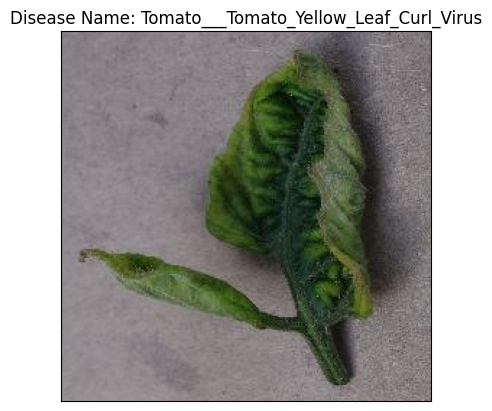

In [61]:
model_prediction = class_name[result_index]

plt.imshow(img_rgb)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()